# Assignment 3
**Problem 1:** Download a Project Gutenberg book and crate a TextBlob. Tokenize the TextBlob into Words and determine wheter any are misspelled. If so, display the possible corrections.

**Problem 2:** Use Pandas plotting to create a bar chart showing the tweet counts for Twitter's trending topics in a city of your choice

## Problem 1

In [14]:
!python -m textblob.download_corpora

Finished.

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Telahun\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Telahun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Telahun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Telahun\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Telahun\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Telahun\AppData\Roaming\nltk_data...


[nltk_data]   Package movie_reviews is already up-to-date!


In [1]:
import nltk

In [24]:
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
from textblob import Word, TextBlob
from operator import itemgetter
from nltk.corpus import stopwords
from wordcloud import WordCloud  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
import imageio
stop_words = stopwords.words('english')
import os 

In [42]:
text = ''
with open(os.getcwd() + '\\utopia-thomas-more.txt') as utopia:
    text = utopia.read()

In [43]:
text

'UTOPIA\nINTRODUCTION\nSir Thomas More, son of Sir John More, a justice of the King\'s Bench, was\nborn in 1478, in Milk Street, in the city of London.  After his earlier\neducation at St. Anthony\'s School, in Threadneedle Street, he was placed,\nas a boy, in the household of Cardinal John Morton, Archbishop of\nCanterbury and Lord Chancellor.  It was not unusual for persons of wealth\nor influence and sons of good families to be so established together in a\nrelation of patron and client.  The youth wore his patron\'s livery, and\nadded to his state.  The patron used, afterwards, his wealth or influence\nin helping his young client forward in the world.  Cardinal Morton had\nbeen in earlier days that Bishop of Ely whom Richard III. sent to the\nTower; was busy afterwards in hostility to Richard; and was a chief\nadviser of Henry VII., who in 1486 made him Archbishop of Canterbury, and\nnine months afterwards Lord Chancellor.  Cardinal Morton--of talk at\nwhose table there are recolle

In [5]:
blob = TextBlob(text)

In [6]:
wordCounts = blob.word_counts.items()
wordCounts = [item for item in wordCounts if item[0] not in stop_words]
wordCounts = sorted(wordCounts, key=itemgetter(1), reverse=True)

In [8]:
misspelled = {}
for word, count in wordCounts:
    check = Word(word).spellcheck()
    if len(check) == 1:
        word, score = check[0]
        if str(score) != '1.0':
            misspelled[word] = check
    else:
        misspelled[word] = check

## Possible Misspelled words with corrections

In [9]:
misspelled

{'soever': [('over', 0.3745252702307917),
  ('never', 0.17323984808647386),
  ('however', 0.12562080046742624),
  ('ever', 0.08004674262342974),
  ('severe', 0.05054046158340637),
  ('seven', 0.03856266432953549),
  ('silver', 0.037394098743791994),
  ('fever', 0.021910604732690624),
  ('forever', 0.01694420099328075),
  ('clever', 0.016359918200409),
  ('cover', 0.011101373064563248),
  ('sooner', 0.009640666082383873),
  ('lover', 0.007595676307332749),
  ('solved', 0.005550686532281624),
  ('solve', 0.0052585451358457495),
  ('whoever', 0.0043821209465381246),
  ('softer', 0.00292141396435875),
  ('shiver', 0.0023371311714869996),
  ('sheer', 0.0023371311714869996),
  ('sober', 0.002044989775051125),
  ('sneer', 0.0017528483786152498),
  ('salver', 0.0017528483786152498),
  ('steer', 0.0011685655857434998),
  ('seeker', 0.0011685655857434998),
  ('lever', 0.0008764241893076249),
  ('dover', 0.0008764241893076249),
  ('sorter', 0.0005842827928717499),
  ('somber', 0.00058428279287174

In [15]:
len(misspelled)

328

In [10]:
mask_image = imageio.imread('cloud.jpg')
wordcloud = WordCloud(width=1000, height=1000, 
    colormap='prism', mask=mask_image, background_color='white')

In [58]:
cloudText = text.split(' ')
cloudText = [item for item in cloudText if item not in stop_words]
cloudText = ' '.join(cloudText)

In [1]:
wordcloud = wordcloud.generate(cloudText)

NameError: name 'WordCloud' is not defined

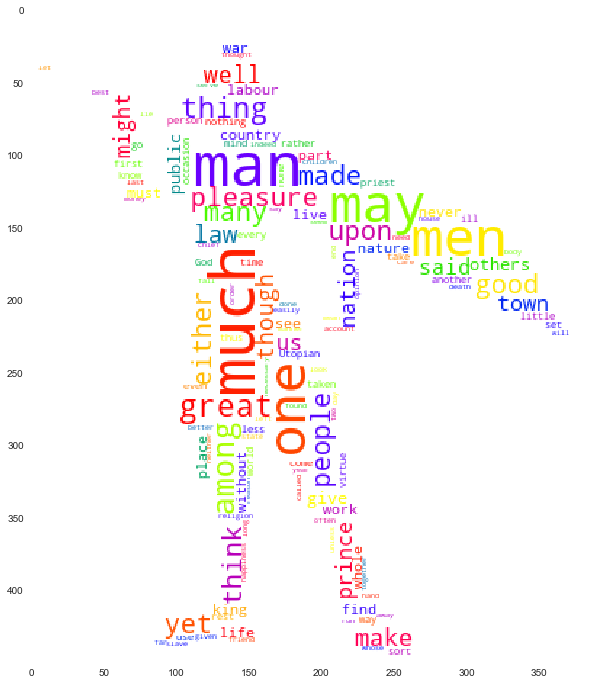

In [62]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.show()

## Problem 2
-  Use Pandas plotting to create a bar chart showing the tweet counts for Twitter's trending topics in a city of your choice

In [65]:
import pandas as pd
import tweepy
import keys

In [68]:
auth = tweepy.OAuthHandler(keys.consumer_key,
                           keys.consumer_secret)
auth.set_access_token(keys.access_token,
                      keys.access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

In [75]:
trends_available = api.trends_available()
print(len(trends_available))
for i in range(0, 50):
    print(i, trends_available[i]['name'])


467
0 Worldwide
1 Winnipeg
2 Ottawa
3 Quebec
4 Montreal
5 Toronto
6 Edmonton
7 Calgary
8 Vancouver
9 Birmingham
10 Blackpool
11 Bournemouth
12 Brighton
13 Bristol
14 Cardiff
15 Coventry
16 Derby
17 Edinburgh
18 Glasgow
19 Hull
20 Leeds
21 Leicester
22 Liverpool
23 Manchester
24 Middlesbrough
25 Newcastle
26 Nottingham
27 Plymouth
28 Portsmouth
29 Preston
30 Sheffield
31 Stoke-on-Trent
32 Swansea
33 London
34 Belfast
35 Santo Domingo
36 Guatemala City
37 Acapulco
38 Aguascalientes
39 Chihuahua
40 Mexico City
41 Ciudad Juarez
42 Nezahualcóyotl
43 Culiacán
44 Ecatepec de Morelos
45 Guadalajara
46 Hermosillo
47 León
48 Mérida
49 Mexicali


In [91]:
bristol = api.trends_place(id=13963)
bristolTrends = bristol[0]['trends']
trends_list = [t for t in bristolTrends if t['tweet_volume']]

In [93]:
trends_list.sort(key=itemgetter('tweet_volume'), reverse=True)

In [98]:
data = {}
for trend in trends_list:
    data[trend['name']] = trend['tweet_volume']

In [103]:
datadf = pd.DataFrame(data, index=[0])
datadf

,Apple,iPhone SE,Germany,Mary,#BailoutHumans,snapchat,Brexit,Messi,FIFA,Jamie,...,Badge,Lewis,#OHPOLLYpickmeups,Karl,Rangers,Tom Moore,Hamilton,Kellyanne Conway,Shaun,Dundee
0,533999,156522,110503,99859,70383,62795,62723,62012,57442,43819,...,35325,33282,30179,29652,22202,22194,20333,12530,11539,10663


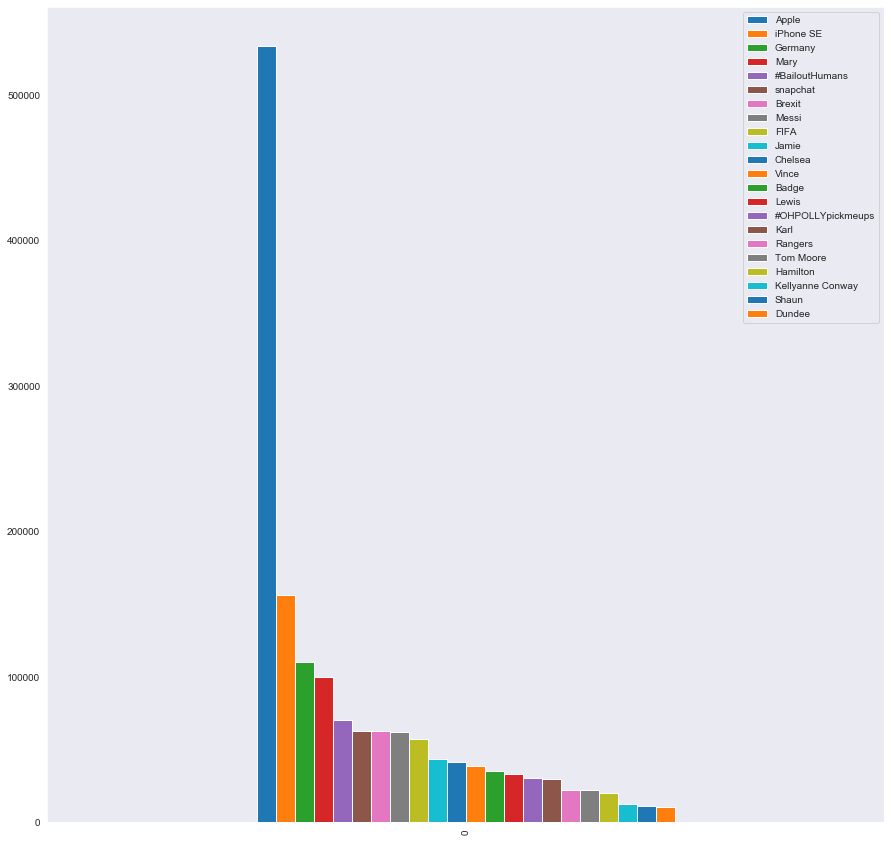

In [114]:
datadf.plot.bar(figsize=(15,15))